In [72]:
# loadings and defaults
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
## Dealing with big data and netcdf
import xarray as xr
from netCDF4 import Dataset
## ROMS packages
from xgcm import Grid
## color maps
import cmaps
import cmocean
## mapping packages
import cartopy.crs as ccrs
import cartopy.feature as cfeature
## System tools and python configuration
import os
import glob
import repackage

import numpy.matlib
from xgcm import Grid
import matplotlib.ticker as mticker

%config InlineBackend.figure_format='png'



In [5]:
# ApRES obs
apres_x = 2272.5e3
apres_y = -1029.5e3
apres_m = 22

In [6]:
# load matlab file with ROMS output pre-processed
import scipy.io as sio
roms = sio.loadmat('matfiles_for_figure2.mat')

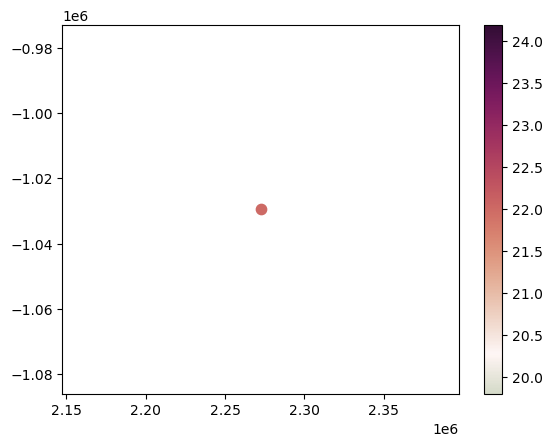

In [106]:
# plt.contour(roms['Coord_x']*1000,roms['Coord_y']*1000,roms['PercentDiff'],levels=[0],colors='k')
# plt.contour(roms['Coord_x']*1000,roms['Coord_y']*1000,roms['Zice']*-1,levels=np.array([0,1]),colors='C1')
cmap = cmocean.cm.curl
newcmap = cmocean.tools.crop(cmap, vmin=-10,vmax=80,pivot=0)
plt.scatter(apres_x,apres_y,s=55,c=apres_m,cmap=newcmap)
# ax=plt.gca()
# ax.set_facecolor('xkcd:navy')

plt.colorbar()

plt.show()

In [36]:


import rioxarray

Gourmelen = rioxarray.open_rasterio('../data/raw/TottenBasalMeltRates.tif')

moa_full = rioxarray.open_rasterio('../src/thirdparty/modismoa/data/moa750_2009_hp1_v02.0.tif')

#subset moa to totten region for speed
moa = moa_full.where((moa_full.x>2e6)&(moa_full.x<2.5e6)&(moa_full.y>-1.5e6)&(moa_full.y<-0.9e6),drop=True)

#mask out ocean areas
moa = moa.where(moa!=0,np.NaN)

In [9]:
from pyproj import Transformer
from pyproj import CRS
ps_to_ll = Transformer.from_crs( "EPSG:3031","EPSG:4326")
ll_to_ps = Transformer.from_crs( "EPSG:4326","EPSG:3031")

arr_start_ps=(2234.541e3,-1021.968e3)
arr_start = ps_to_ll.transform(arr_start_ps[0],arr_start_ps[1])
print(arr_start_ps)
arr_end = ll_to_ps.transform(arr_start[0]+0.15,arr_start[1])
print(arr_end)

(2234541.0, -1021968.0)
(2249921.25167608, -1029002.1627407594)


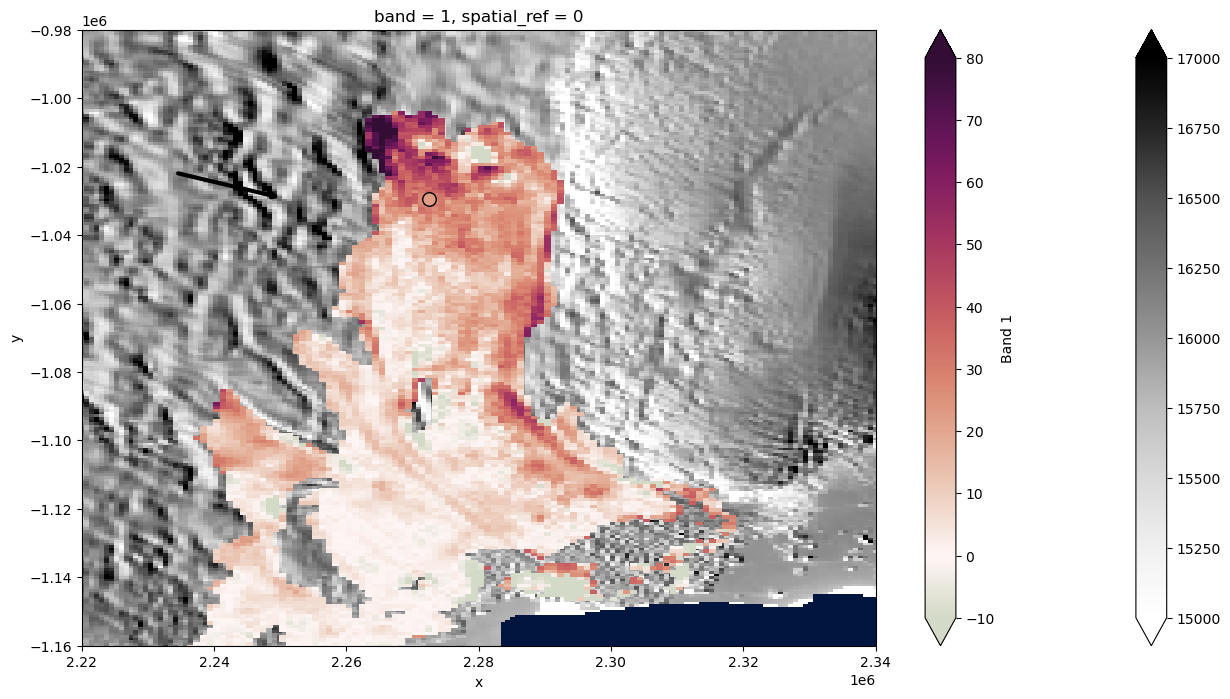

In [124]:
# make 0 pivot colorbar
cmap = cmocean.cm.curl
newcmap = cmocean.tools.crop(cmap, vmin=-10,vmax=80,pivot=0)


fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
moa.plot(ax=ax,cmap='Greys',vmin=15000 ,vmax=17000)
Gourmelen.plot(ax=ax,vmin=-10,vmax=80,cmap=newcmap)
ax.axis([2220e3,2340e3,-1160e3,-980e3])
ax=plt.gca()
ax.set_facecolor('xkcd:navy')
ax.annotate('', xy = (arr_start_ps[0],arr_start_ps[1]),  xycoords = 'data', \
    xytext = (arr_end[0],arr_end[1]), textcoords = 'data', fontsize = 7, \
    color = '#303030', arrowprops=dict(edgecolor='black', shrinkA = 0, shrinkB = 0,arrowstyle='<-',lw=3))
ax.scatter(apres_x,apres_y,s=95,c=apres_m,cmap=newcmap,vmin=-10,vmax=80,edgecolors='k')



Text(0.5, 1.0, '% diff\nto No Flow')

<Figure size 640x480 with 0 Axes>

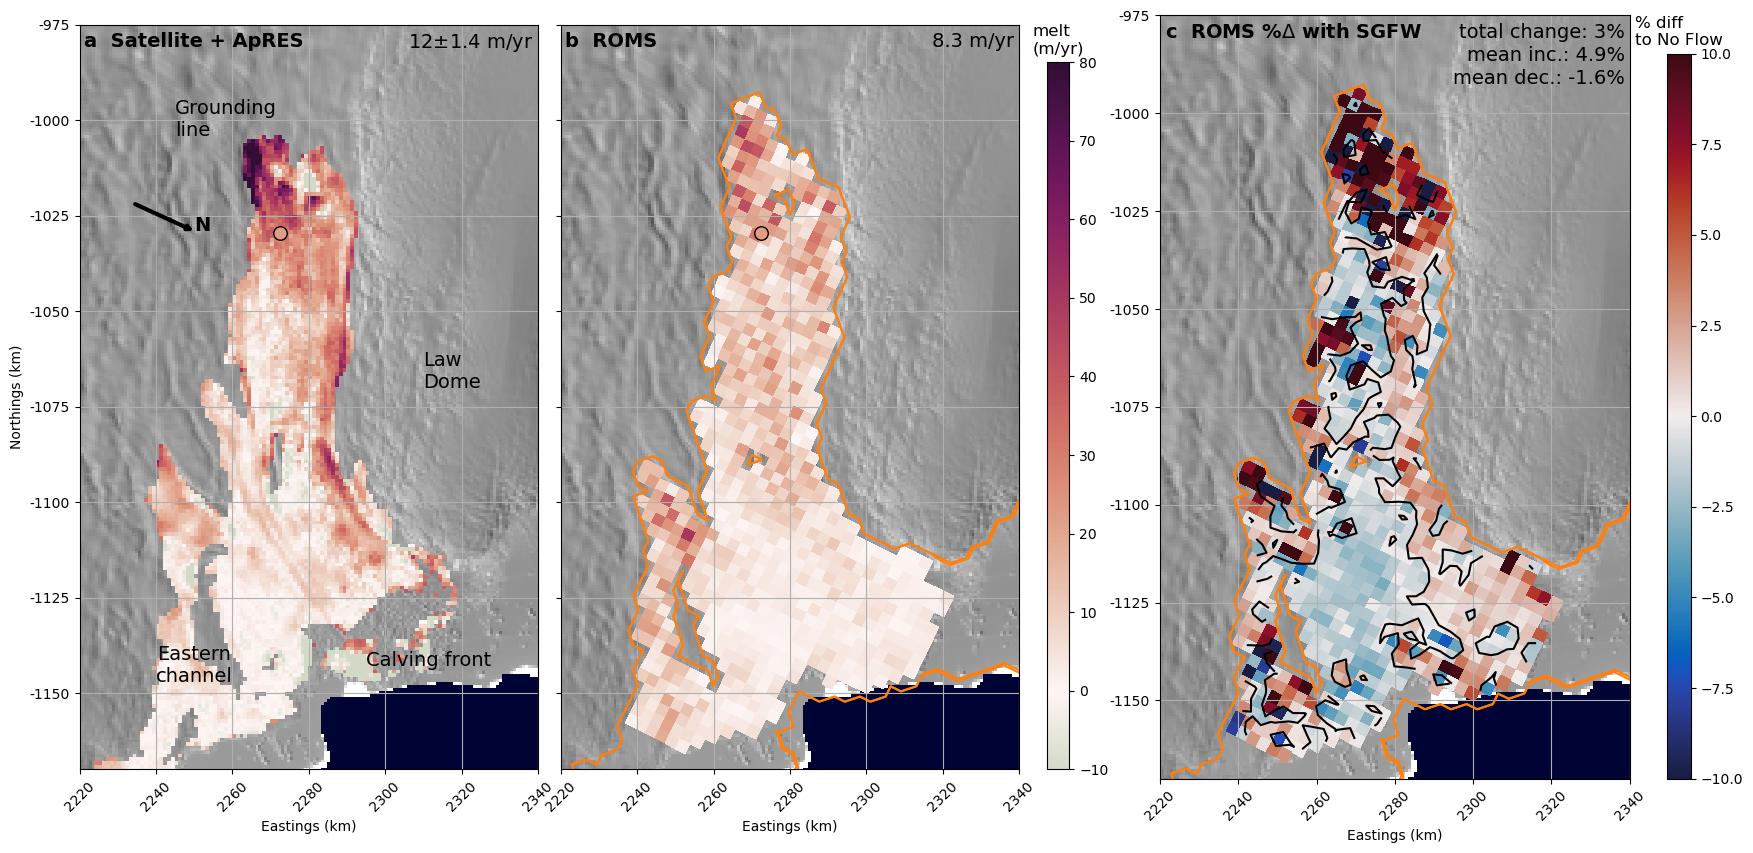

In [127]:
# make 0 pivot colorbar
cmap = cmocean.cm.curl
newcmap = cmocean.tools.crop(cmap, vmin=-10,vmax=80,pivot=0)

gs0 = fig.add_gridspec(nrows=1,ncols=2,width_ratios=[2,1])
gs00 = gs0[0].subgridspec(1, 2,wspace=0.05, hspace=0.05)
gs01 = gs0[1].subgridspec(1, 1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[20,12.5])
ax = None

# add plots

ax1 = fig.add_subplot(gs00[0,0])
moa.plot(ax=ax1,cmap='Greys',vmin=12000 ,vmax=20000,add_colorbar=False)
Gourmelen.plot(ax=ax1,vmin=-10,vmax=80,cmap=newcmap,add_colorbar=False)
ax1.scatter(apres_x,apres_y,s=95,c=apres_m,cmap=newcmap,vmin=-10,vmax=80,edgecolors='k')
ax1.set_facecolor('xkcd:dark navy')
ax1.set_ylabel('Northings (km)')
ax1.set_xlabel('Eastings (km)')
ax1.grid()
ax1.text(0.01, 0.99, 'a  Satellite + ApRES', transform=ax1.transAxes,fontsize=14, fontweight='bold', va='top')
ax1.text(0.99, 0.99, '12$\pm$1.4 m/yr', transform=ax1.transAxes,fontsize=14, va='top',ha='right')
plt.axis('scaled')
ax1.set_ylim([-1.170e6,-.9750e6])
ax1.set_xlim([2.220e6,2.340e6])
plt.xticks(rotation=45)
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax1.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax1.yaxis.set_major_formatter(ticks_y)
# axis decorations
ax1.text(2240e3,-1147e3,'Eastern\nchannel',fontsize=14, multialignment='center')
ax1.text(2310e3,-1070e3,'Law\nDome',fontsize=14, multialignment='left')
ax1.text(2295e3,-1143e3,'Calving front',fontsize=14)
ax1.text(2245e3,-1004e3,'Grounding\nline',fontsize=14, multialignment='left')
ax1.annotate('', xy = (arr_start_ps[0],arr_start_ps[1]),  xycoords = 'data', \
    xytext = (arr_end[0],arr_end[1]), textcoords = 'data', fontsize = 7, \
    color = '#303030', arrowprops=dict(edgecolor='black', shrinkA = 0, shrinkB = 0,arrowstyle='<-',lw=3))
ax1.text(arr_end[0],arr_end[1],'N',fontweight='bold',fontsize=14)
ax1.set_title('')

#

ax2 = fig.add_subplot(gs00[0,1])
moa.plot(ax=ax2,cmap='Greys',vmin=12000 ,vmax=20000,add_colorbar=False)
im = plt.pcolormesh(roms['Coord_x']*1000,roms['Coord_y']*1000,roms['Melt'],vmin=-10,vmax=80,cmap=newcmap)
ax2.contour(roms['Coord_x']*1000,roms['Coord_y']*1000,roms['Zice']*-1,levels=np.array([0,1]),colors='C1')
ax2.scatter(apres_x,apres_y,s=95,c=apres_m,cmap=newcmap,vmin=-10,vmax=80,edgecolors='k')
ax2.set_facecolor('xkcd:dark navy')
ax2.set_ylabel('')
ax2.set_xlabel('Eastings (km)')
ax2.grid()
ax2.text(0.01, 0.99, 'b  ROMS', transform=ax2.transAxes,fontsize=14, fontweight='bold', va='top')
ax2.text(0.99, 0.99, '8.3 m/yr', transform=ax2.transAxes,fontsize=14, va='top',ha='right')
plt.axis('scaled')
ax2.set_ylim([-1.170e6,-.9750e6])
ax2.set_xlim([2.220e6,2.340e6])
plt.xticks(rotation=45)
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax2.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax2.yaxis.set_major_formatter(ticks_y)
ax2.set_yticklabels([])
ax2.set_title('')
cax = inset_axes(ax2,
                width="5%",  # width = 10% of parent_bbox width
                height="95%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(1.06,0, 1, 1),
                bbox_transform=ax2.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax) 
cax.set_title('melt\n(m/yr)', multialignment='left')

#

ax3 = fig.add_subplot(gs01[0,0])
moa.plot(ax=ax3,cmap='Greys',vmin=12000 ,vmax=20000,add_colorbar=False)
im = plt.pcolormesh(roms['Coord_x']*1000,roms['Coord_y']*1000,roms['PercentDiff'],vmin=-10,vmax=10,cmap='cmo.balance')
ax3.contour(roms['Coord_x']*1000,roms['Coord_y']*1000,roms['PercentDiff'],levels=[0],colors='k')
ax3.contour(roms['Coord_x']*1000,roms['Coord_y']*1000,roms['Zice']*-1,levels=np.array([0,1]),colors='C1')
ax3.set_facecolor('xkcd:dark navy')
ax3.set_ylabel('')
ax3.set_xlabel('Eastings (km)')
ax3.grid()
ax3.text(0.01, 0.99, 'c  ROMS %$\Delta$ with SGFW', transform=ax3.transAxes,fontsize=14, fontweight='bold', va='top')
ax3.text(0.99, 0.99, 'total change: 3%', transform=ax3.transAxes,fontsize=14, va='top',ha='right')
ax3.text(0.99, 0.96, 'mean inc.: 4.9%', transform=ax3.transAxes,fontsize=14, va='top',ha='right')
ax3.text(0.99, 0.93, 'mean dec.: -1.6%', transform=ax3.transAxes,fontsize=14, va='top',ha='right')
plt.axis('scaled')
ax3.set_ylim([-1.170e6,-.9750e6])
ax3.set_xlim([2.220e6,2.340e6])
plt.xticks(rotation=45)
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax3.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax3.yaxis.set_major_formatter(ticks_y)
# ax3.set_yticklabels([])
ax3.set_title('')
cax = inset_axes(ax3,
                width="5%",  # width = 10% of parent_bbox width
                height="95%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(1.08,.00, 1, 1),
                bbox_transform=ax3.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax) 
cax.set_title('% diff\nto No Flow', multialignment='left')


# plt.savefig('../outputs/figure_bathy_draft.png',dpi=300)


[Text(1, -40.0, '-40'),
 Text(1, -20.0, '-20'),
 Text(1, -10.0, '-10'),
 Text(1, -5.0, '-5'),
 Text(1, -2.5, '-2.5'),
 Text(1, -1.0, '-1'),
 Text(1, 0.0, '0'),
 Text(1, 1.0, '1'),
 Text(1, 2.5, '2.5'),
 Text(1, 5.0, '5'),
 Text(1, 10.0, '10'),
 Text(1, 20.0, '20'),
 Text(1, 40.0, '40')]

<Figure size 640x480 with 0 Axes>

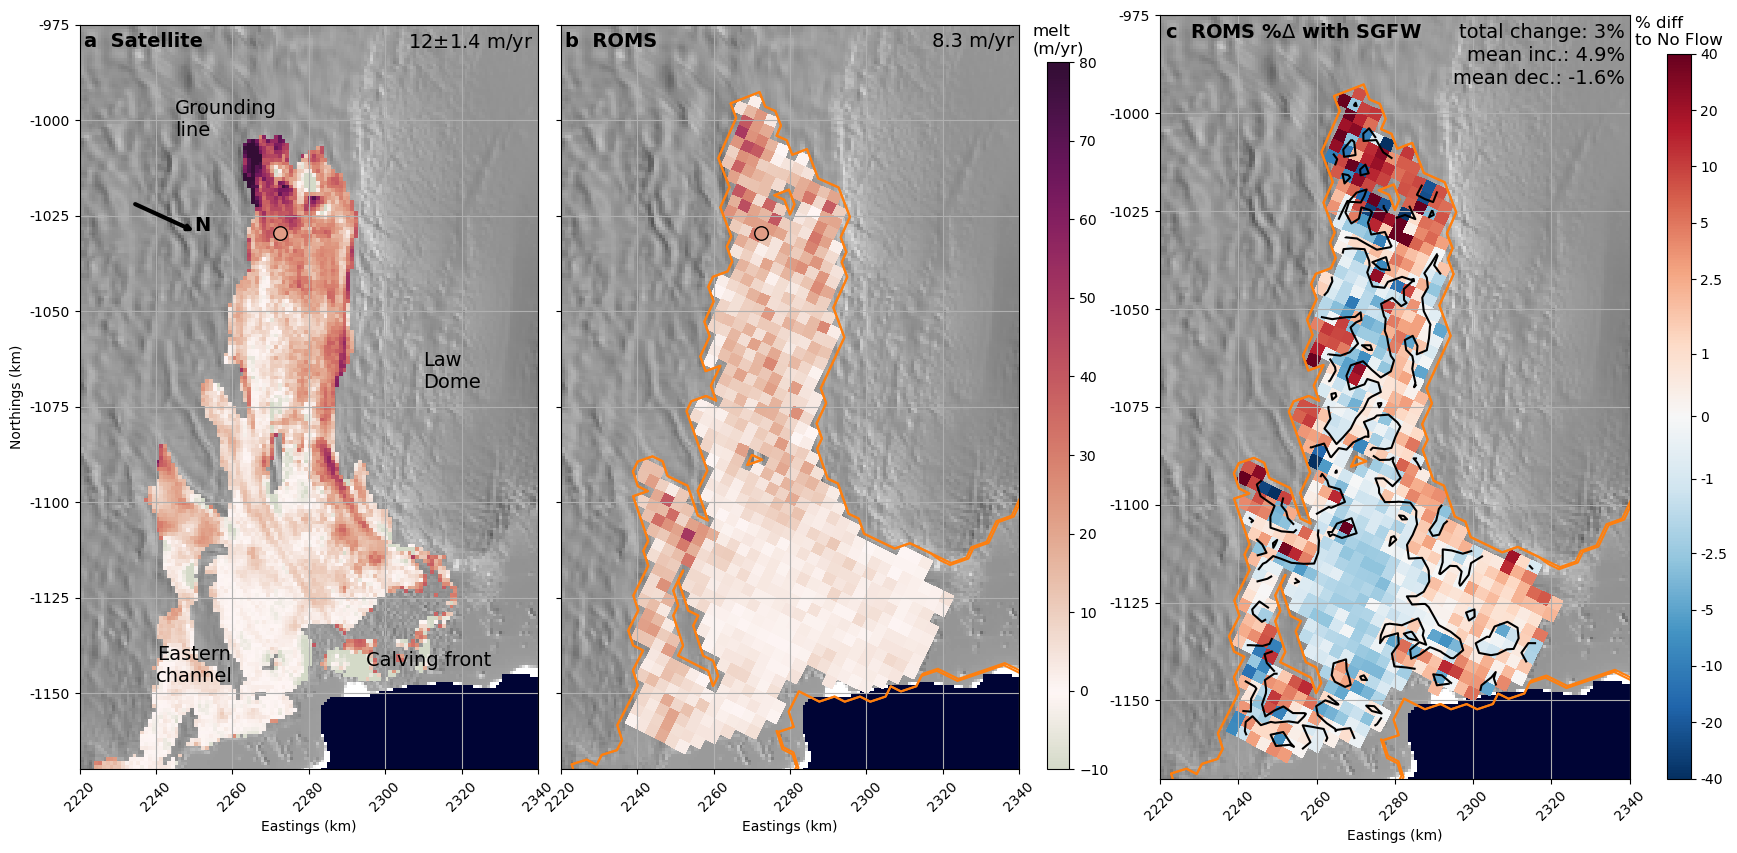

In [140]:
# make 0 pivot colorbar
cmap = cmocean.cm.curl
newcmap = cmocean.tools.crop(cmap, vmin=-10,vmax=80,pivot=0)

gs0 = fig.add_gridspec(nrows=1,ncols=2,width_ratios=[2,1])
gs00 = gs0[0].subgridspec(1, 2,wspace=0.05, hspace=0.05)
gs01 = gs0[1].subgridspec(1, 1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[20,12.5])
ax = None

# add plots

ax1 = fig.add_subplot(gs00[0,0])
moa.plot(ax=ax1,cmap='Greys',vmin=12000 ,vmax=20000,add_colorbar=False)
Gourmelen.plot(ax=ax1,vmin=-10,vmax=80,cmap=newcmap,add_colorbar=False)
ax1.scatter(apres_x,apres_y,s=95,c=apres_m,cmap=newcmap,vmin=-10,vmax=80,edgecolors='k')
ax1.set_facecolor('xkcd:dark navy')
ax1.set_ylabel('Northings (km)')
ax1.set_xlabel('Eastings (km)')
ax1.grid()
ax1.text(0.01, 0.99, 'a  Satellite', transform=ax1.transAxes,fontsize=14, fontweight='bold', va='top')
ax1.text(0.99, 0.99, '12$\pm$1.4 m/yr', transform=ax1.transAxes,fontsize=14, va='top',ha='right')
plt.axis('scaled')
ax1.set_ylim([-1.170e6,-.9750e6])
ax1.set_xlim([2.220e6,2.340e6])
plt.xticks(rotation=45)
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax1.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax1.yaxis.set_major_formatter(ticks_y)
# axis decorations
ax1.text(2240e3,-1147e3,'Eastern\nchannel',fontsize=14, multialignment='center')
ax1.text(2310e3,-1070e3,'Law\nDome',fontsize=14, multialignment='left')
ax1.text(2295e3,-1143e3,'Calving front',fontsize=14)
ax1.text(2245e3,-1004e3,'Grounding\nline',fontsize=14, multialignment='left')
ax1.annotate('', xy = (arr_start_ps[0],arr_start_ps[1]),  xycoords = 'data', \
    xytext = (arr_end[0],arr_end[1]), textcoords = 'data', fontsize = 7, \
    color = '#303030', arrowprops=dict(edgecolor='black', shrinkA = 0, shrinkB = 0,arrowstyle='<-',lw=3))
ax1.text(arr_end[0],arr_end[1],'N',fontweight='bold',fontsize=14)
ax1.set_title('')

#

ax2 = fig.add_subplot(gs00[0,1])
moa.plot(ax=ax2,cmap='Greys',vmin=12000 ,vmax=20000,add_colorbar=False)
im = plt.pcolormesh(roms['Coord_x']*1000,roms['Coord_y']*1000,roms['Melt'],vmin=-10,vmax=80,cmap=newcmap)
ax2.contour(roms['Coord_x']*1000,roms['Coord_y']*1000,roms['Zice']*-1,levels=np.array([0,1]),colors='C1')
ax2.scatter(apres_x,apres_y,s=95,c=apres_m,cmap=newcmap,vmin=-10,vmax=80,edgecolors='k')
ax2.set_facecolor('xkcd:dark navy')
ax2.set_ylabel('')
ax2.set_xlabel('Eastings (km)')
ax2.grid()
ax2.text(0.01, 0.99, 'b  ROMS', transform=ax2.transAxes,fontsize=14, fontweight='bold', va='top')
ax2.text(0.99, 0.99, '8.3 m/yr', transform=ax2.transAxes,fontsize=14, va='top',ha='right')
plt.axis('scaled')
ax2.set_ylim([-1.170e6,-.9750e6])
ax2.set_xlim([2.220e6,2.340e6])
plt.xticks(rotation=45)
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax2.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax2.yaxis.set_major_formatter(ticks_y)
ax2.set_yticklabels([])
ax2.set_title('')
cax = inset_axes(ax2,
                width="5%",  # width = 10% of parent_bbox width
                height="95%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(1.06,0, 1, 1),
                bbox_transform=ax2.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax) 
cax.set_title('melt\n(m/yr)', multialignment='left')

#

ax3 = fig.add_subplot(gs01[0,0])
moa.plot(ax=ax3,cmap='Greys',vmin=12000 ,vmax=20000,add_colorbar=False)
im = plt.pcolormesh(roms['Coord_x']*1000,roms['Coord_y']*1000,roms['PercentDiff'],
                    norm = colors.SymLogNorm(linthresh = 1,
                                                linscale = .3,
                                                vmin =-40.0, 
                                                vmax = 40.0),
                    cmap='RdBu_r')
ax3.contour(roms['Coord_x']*1000,roms['Coord_y']*1000,roms['PercentDiff'],levels=[0],colors='k')
ax3.contour(roms['Coord_x']*1000,roms['Coord_y']*1000,roms['Zice']*-1,levels=np.array([0,1]),colors='C1')
ax3.set_facecolor('xkcd:dark navy')
ax3.set_ylabel('')
ax3.set_xlabel('Eastings (km)')
ax3.grid()
ax3.text(0.01, 0.99, 'c  ROMS %$\Delta$ with SGFW', transform=ax3.transAxes,fontsize=14, fontweight='bold', va='top')
ax3.text(0.99, 0.99, 'total change: 3%', transform=ax3.transAxes,fontsize=14, va='top',ha='right')
ax3.text(0.99, 0.96, 'mean inc.: 4.9%', transform=ax3.transAxes,fontsize=14, va='top',ha='right')
ax3.text(0.99, 0.93, 'mean dec.: -1.6%', transform=ax3.transAxes,fontsize=14, va='top',ha='right')
plt.axis('scaled')
ax3.set_ylim([-1.170e6,-.9750e6])
ax3.set_xlim([2.220e6,2.340e6])
plt.xticks(rotation=45)
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax3.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax3.yaxis.set_major_formatter(ticks_y)
# ax3.set_yticklabels([])
ax3.set_title('')
cax = inset_axes(ax3,
                width="5%",  # width = 10% of parent_bbox width
                height="95%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(1.08,.00, 1, 1),
                bbox_transform=ax3.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax,ticks=[-40,-20,-10,-5,-2.5,-1,0,1,2.5,5,10,20,40]) 
cax.set_title('% diff\nto No Flow', multialignment='left')
cax.set_yticklabels([-40,-20,-10,-5,-2.5,-1,0,1,2.5,5,10,20,40])

# plt.savefig('../outputs/figure_bathy_draft.png',dpi=300)


In [13]:
STOP

NameError: name 'STOP' is not defined

<ipython-input-5-744357ae81fe>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=plt.pcolormesh(gridFile.x_rho/1000,gridFile.y_rho/1000,((norm.m*365*60*60*24).mean(dim='ocean_time')-(noflow.m*365*60*60*24).mean(dim='ocean_time'))/(noflow.m*365*60*60*24).mean(dim='ocean_time')*100,vmin=-10,vmax=10,cmap='cmo.balance')


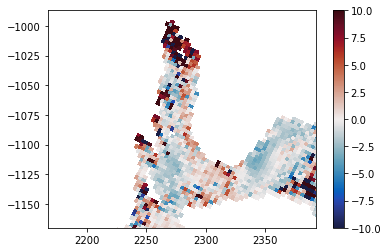

In [ ]:
im=plt.pcolormesh(gridFile.x_rho/1000,gridFile.y_rho/1000,((norm.m*365*60*60*24).mean(dim='ocean_time')-(noflow.m*365*60*60*24).mean(dim='ocean_time'))/(noflow.m*365*60*60*24).mean(dim='ocean_time')*100,vmin=-10,vmax=10,cmap='cmo.balance')
plt.axis('equal')
plt.xlim([2.240e3,2.32e3])
plt.ylim([-1.170e3,-.987e3])
plt.colorbar(im)


<ipython-input-16-ac72ad9a2911>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=plt.pcolormesh(gridFile.x_rho/1000,gridFile.y_rho/1000,norm.temp.isel(s_rho=-1).mean(dim='ocean_time')-noflow.temp.isel(s_rho=-1).mean(dim='ocean_time'),vmin=-.05,vmax=.05,cmap='cmo.balance')


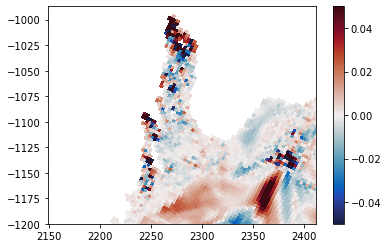

In [ ]:
im=plt.pcolormesh(gridFile.x_rho/1000,gridFile.y_rho/1000,norm.temp.isel(s_rho=-1).mean(dim='ocean_time')-noflow.temp.isel(s_rho=-1).mean(dim='ocean_time'),vmin=-.05,vmax=.05,cmap='cmo.balance')
plt.axis('equal')
plt.xlim([2.240e3,2.32e3])
plt.ylim([-1.20e3,-.987e3])
plt.colorbar(im)


<ipython-input-17-5d39c884d19f>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=plt.pcolormesh(gridFile.x_rho/1000,gridFile.y_rho/1000,norm.temp.isel(s_rho=0).mean(dim='ocean_time')-noflow.temp.isel(s_rho=0).mean(dim='ocean_time'),vmin=-.05,vmax=.05,cmap='cmo.balance')


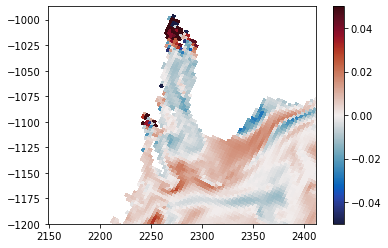

In [ ]:
im=plt.pcolormesh(gridFile.x_rho/1000,gridFile.y_rho/1000,norm.temp.isel(s_rho=0).mean(dim='ocean_time')-noflow.temp.isel(s_rho=0).mean(dim='ocean_time'),vmin=-.05,vmax=.05,cmap='cmo.balance')
plt.axis('equal')
plt.xlim([2.240e3,2.32e3])
plt.ylim([-1.20e3,-.987e3])
plt.colorbar(im)


<ipython-input-7-3f0abf0b1197>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=plt.pcolormesh(gridFile.x_rho/1000,gridFile.y_rho/1000,norm.salt.isel(s_rho=-1).mean(dim='ocean_time')-noflow.salt.isel(s_rho=-1).mean(dim='ocean_time'),vmin=-.1,vmax=.1,cmap='cmo.balance')


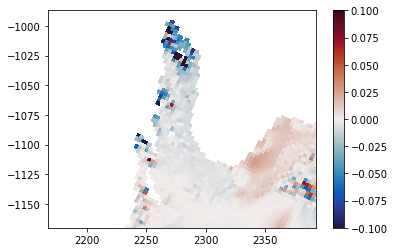

In [ ]:
im=plt.pcolormesh(gridFile.x_rho/1000,gridFile.y_rho/1000,norm.salt.isel(s_rho=-1).mean(dim='ocean_time')-noflow.salt.isel(s_rho=-1).mean(dim='ocean_time'),vmin=-.1,vmax=.1,cmap='cmo.balance')
plt.axis('equal')
plt.xlim([2.240e3,2.32e3])
plt.ylim([-1.170e3,-.987e3])
plt.colorbar(im)


<ipython-input-10-2bc1d33d1db0>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=plt.pcolormesh(gridFile.x_rho/1000,gridFile.y_rho/1000,norm_uv.vmag.isel(s_rho=-1).mean(dim='ocean_time')-noflow_uv.vmag.isel(s_rho=-1).mean(dim='ocean_time'),vmin=-.01,vmax=.01,cmap='cmo.balance')


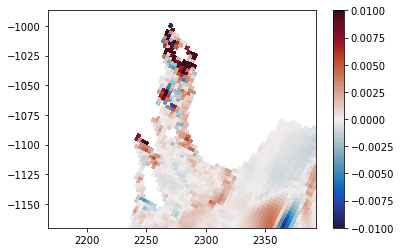

In [ ]:


im=plt.pcolormesh(gridFile.x_rho/1000,gridFile.y_rho/1000,norm_uv.vmag.isel(s_rho=-1).mean(dim='ocean_time')-noflow_uv.vmag.isel(s_rho=-1).mean(dim='ocean_time'),vmin=-.01,vmax=.01,cmap='cmo.balance')
plt.axis('equal')
plt.xlim([2.240e3,2.32e3])
plt.ylim([-1.170e3,-.987e3])
plt.colorbar(im)


<ipython-input-66-856e31e3cb3c>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=plt.pcolormesh(gridFile.lon_rho,gridFile.lat_rho,norm_uv.vmag.isel(s_rho=25).mean(dim='ocean_time')-noflow_uv.vmag.isel(s_rho=25).mean(dim='ocean_time'),vmin=-.01,vmax=.01,cmap='cmo.balance')


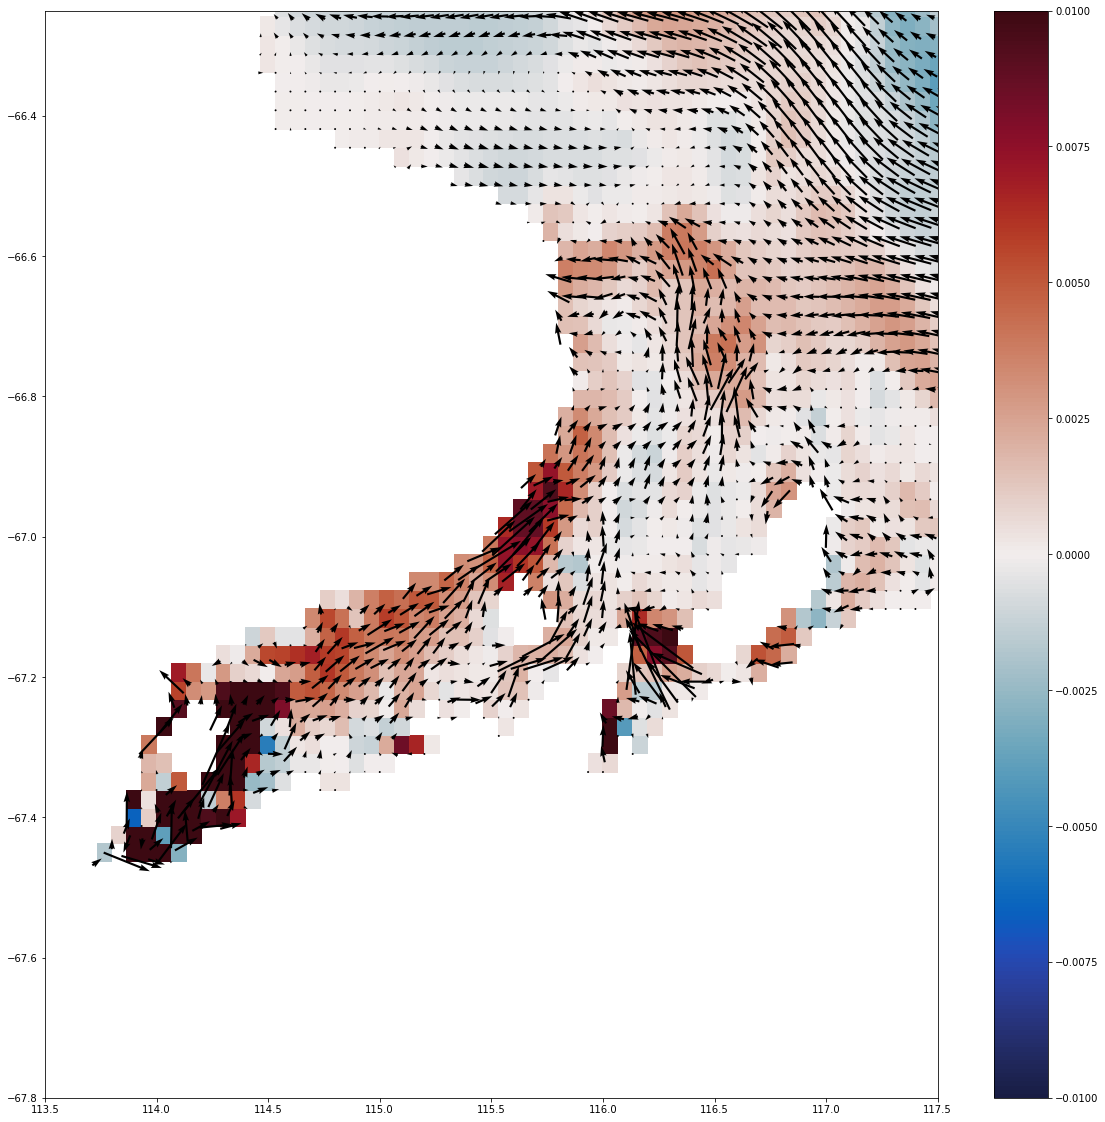

In [ ]:

fig = plt.figure(figsize=(20,20))
im=plt.pcolormesh(gridFile.lon_rho,gridFile.lat_rho,norm_uv.vmag.isel(s_rho=25).mean(dim='ocean_time')-noflow_uv.vmag.isel(s_rho=25).mean(dim='ocean_time'),vmin=-.01,vmax=.01,cmap='cmo.balance')
qu = plt.quiver(gridFile.lon_rho,gridFile.lat_rho,norm_uv.u_rho.isel(s_rho=25).mean(dim='ocean_time'),norm_uv.v_rho.isel(s_rho=25).mean(dim='ocean_time'),units='xy',pivot='mid',scale=1)
plt.xlim([113.5,117.5])
plt.ylim([-67.8,-66.25])
plt.colorbar(im)


<ipython-input-68-57a26e15d7e4>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=plt.pcolormesh(gridFile.lon_rho,gridFile.lat_rho,norm_uv.vmag.isel(s_rho=15).mean(dim='ocean_time')-noflow_uv.vmag.isel(s_rho=15).mean(dim='ocean_time'),vmin=-.01,vmax=.01,cmap='cmo.balance')


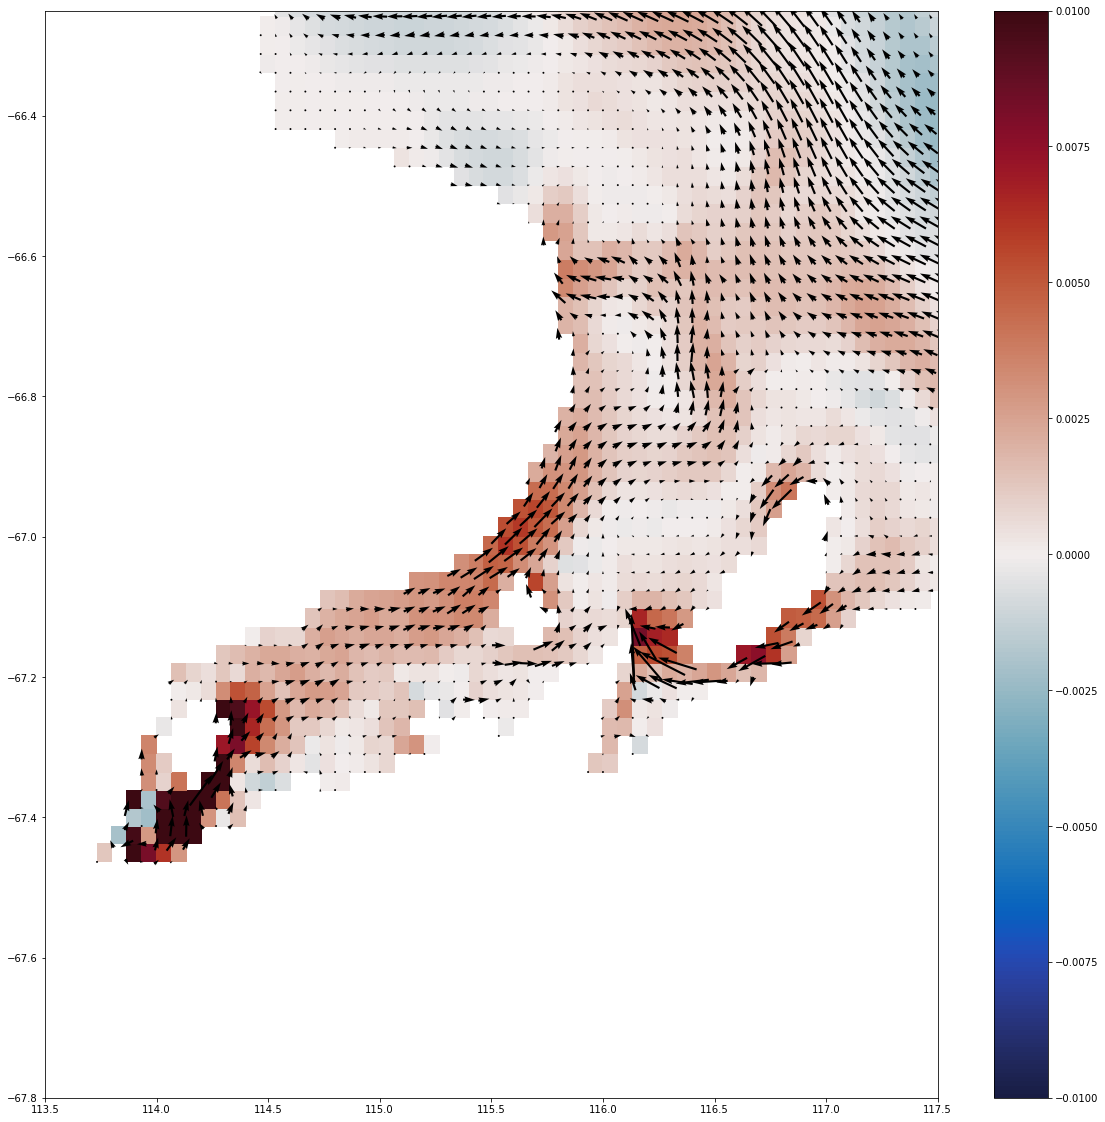

In [ ]:

fig = plt.figure(figsize=(20,20))
im=plt.pcolormesh(gridFile.lon_rho,gridFile.lat_rho,norm_uv.vmag.isel(s_rho=15).mean(dim='ocean_time')-noflow_uv.vmag.isel(s_rho=15).mean(dim='ocean_time'),vmin=-.01,vmax=.01,cmap='cmo.balance')
qu = plt.quiver(gridFile.lon_rho,gridFile.lat_rho,norm_uv.u_rho.isel(s_rho=15).mean(dim='ocean_time'),norm_uv.v_rho.isel(s_rho=15).mean(dim='ocean_time'),units='xy',pivot='mid',scale=1)
plt.xlim([113.5,117.5])
plt.ylim([-67.8,-66.25])
plt.colorbar(im)


<ipython-input-67-3ce715205626>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=plt.pcolormesh(gridFile.lon_rho,gridFile.lat_rho,norm_uv.vmag.isel(s_rho=0).mean(dim='ocean_time')-noflow_uv.vmag.isel(s_rho=0).mean(dim='ocean_time'),vmin=-.01,vmax=.01,cmap='cmo.balance')


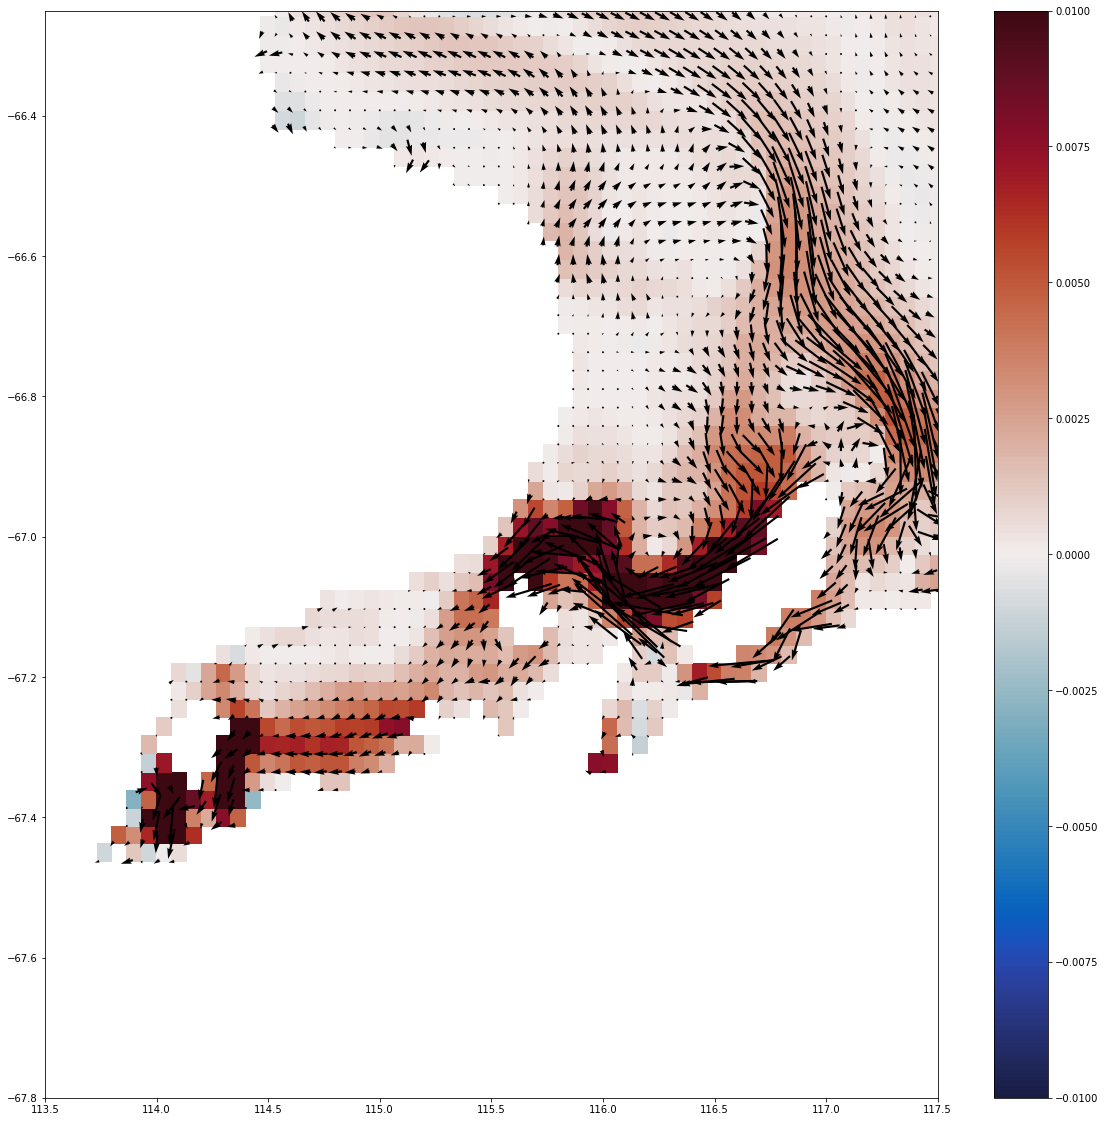

In [ ]:

fig = plt.figure(figsize=(20,20))
im=plt.pcolormesh(gridFile.lon_rho,gridFile.lat_rho,norm_uv.vmag.isel(s_rho=0).mean(dim='ocean_time')-noflow_uv.vmag.isel(s_rho=0).mean(dim='ocean_time'),vmin=-.01,vmax=.01,cmap='cmo.balance')
qu = plt.quiver(gridFile.lon_rho,gridFile.lat_rho,norm_uv.u_rho.isel(s_rho=0).mean(dim='ocean_time'),norm_uv.v_rho.isel(s_rho=0).mean(dim='ocean_time'),units='xy',pivot='mid',scale=1)
plt.xlim([113.5,117.5])
plt.ylim([-67.8,-66.25])
plt.colorbar(im)


<ipython-input-75-069cec3d4a99>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=plt.pcolormesh(gridFile.lon_rho,gridFile.lat_rho,norm.temp.isel(s_rho=25).mean(dim='ocean_time')-noflow.temp.isel(s_rho=25).mean(dim='ocean_time'),vmin=-.1,vmax=.1,cmap='cmo.balance')


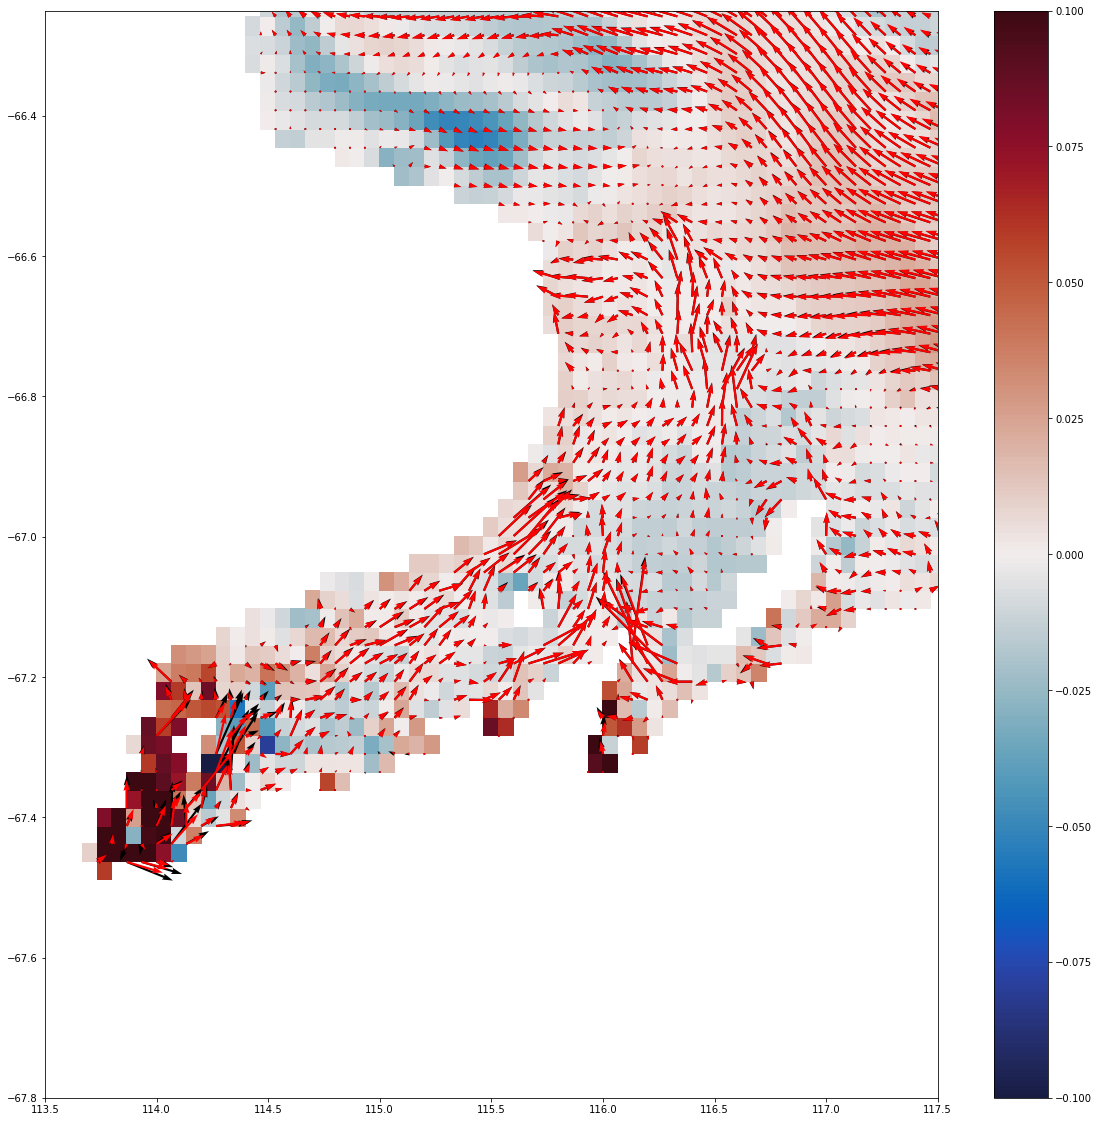

In [ ]:

fig = plt.figure(figsize=(20,20))
im=plt.pcolormesh(gridFile.lon_rho,gridFile.lat_rho,norm.temp.isel(s_rho=25).mean(dim='ocean_time')-noflow.temp.isel(s_rho=25).mean(dim='ocean_time'),vmin=-.1,vmax=.1,cmap='cmo.balance')
qu = plt.quiver(gridFile.lon_rho,gridFile.lat_rho,norm_uv.u_rho.isel(s_rho=25).mean(dim='ocean_time'),norm_uv.v_rho.isel(s_rho=25).mean(dim='ocean_time'),units='xy',pivot='tail',scale=1)
qu = plt.quiver(gridFile.lon_rho,gridFile.lat_rho,noflow_uv.u_rho.isel(s_rho=25).mean(dim='ocean_time'),noflow_uv.v_rho.isel(s_rho=25).mean(dim='ocean_time'),units='xy',pivot='tail',scale=1,color='r')

plt.xlim([113.5,117.5])
plt.ylim([-67.8,-66.25])
plt.colorbar(im)


<ipython-input-76-145b34a86569>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=plt.pcolormesh(gridFile.lon_rho,gridFile.lat_rho,norm.temp.isel(s_rho=15).mean(dim='ocean_time')-noflow.temp.isel(s_rho=15).mean(dim='ocean_time'),vmin=-.1,vmax=.1,cmap='cmo.balance')


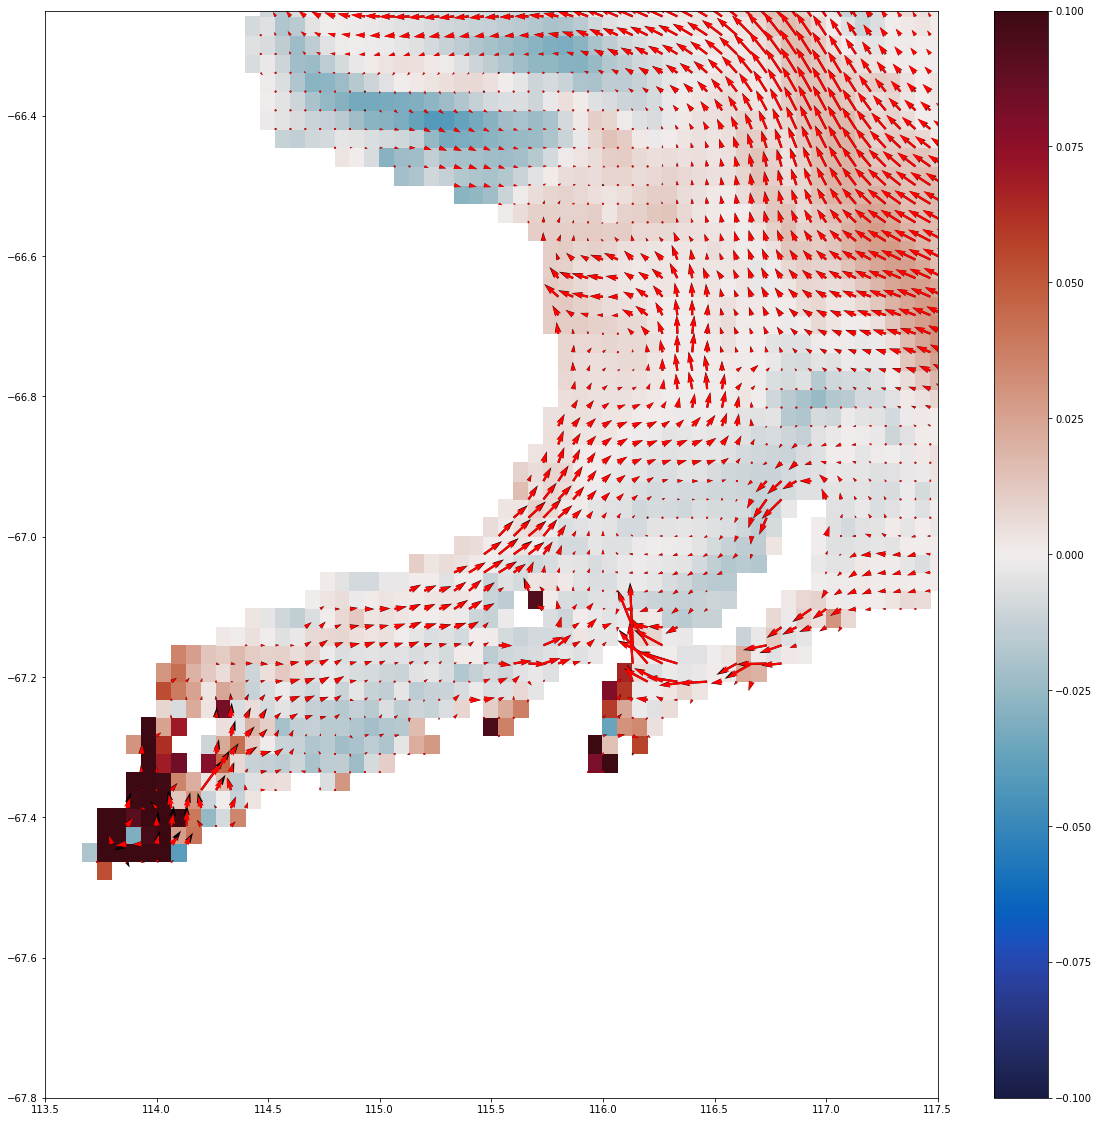

In [ ]:

fig = plt.figure(figsize=(20,20))
im=plt.pcolormesh(gridFile.lon_rho,gridFile.lat_rho,norm.temp.isel(s_rho=15).mean(dim='ocean_time')-noflow.temp.isel(s_rho=15).mean(dim='ocean_time'),vmin=-.1,vmax=.1,cmap='cmo.balance')
qu = plt.quiver(gridFile.lon_rho,gridFile.lat_rho,norm_uv.u_rho.isel(s_rho=15).mean(dim='ocean_time'),norm_uv.v_rho.isel(s_rho=15).mean(dim='ocean_time'),units='xy',pivot='tail',scale=1)
qu = plt.quiver(gridFile.lon_rho,gridFile.lat_rho,noflow_uv.u_rho.isel(s_rho=15).mean(dim='ocean_time'),noflow_uv.v_rho.isel(s_rho=15).mean(dim='ocean_time'),units='xy',pivot='tail',scale=1,color='r')

plt.xlim([113.5,117.5])
plt.ylim([-67.8,-66.25])
plt.colorbar(im)


<ipython-input-73-0991f9eca072>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=plt.pcolormesh(gridFile.lon_rho,gridFile.lat_rho,norm.temp.isel(s_rho=0).mean(dim='ocean_time')-noflow.temp.isel(s_rho=0).mean(dim='ocean_time'),vmin=-.1,vmax=.1,cmap='cmo.balance')


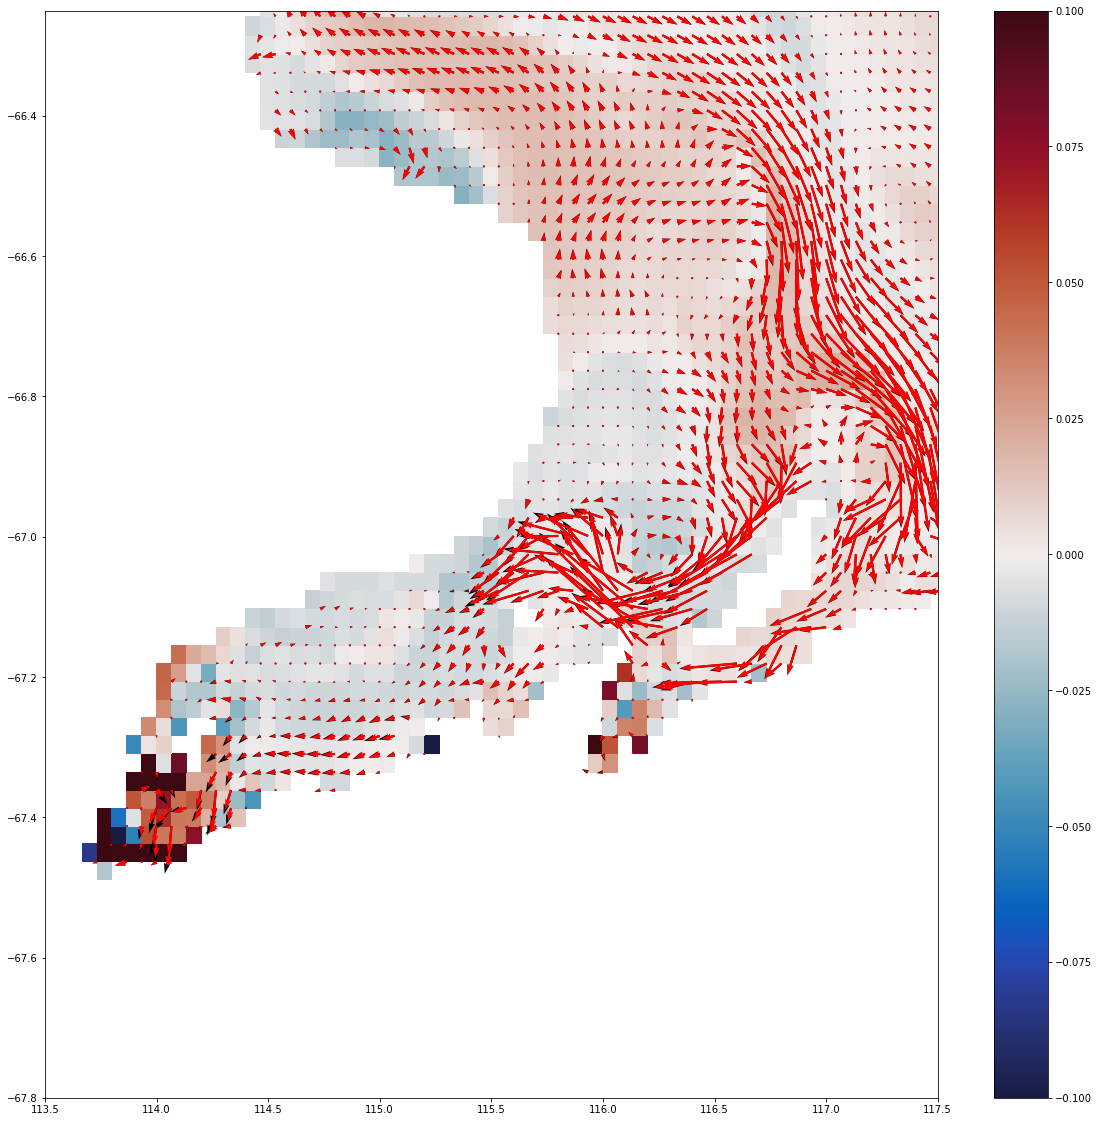

In [ ]:

fig = plt.figure(figsize=(20,20))
im=plt.pcolormesh(gridFile.lon_rho,gridFile.lat_rho,norm.temp.isel(s_rho=0).mean(dim='ocean_time')-noflow.temp.isel(s_rho=0).mean(dim='ocean_time'),vmin=-.1,vmax=.1,cmap='cmo.balance')
qu = plt.quiver(gridFile.lon_rho,gridFile.lat_rho,norm_uv.u_rho.isel(s_rho=0).mean(dim='ocean_time'),norm_uv.v_rho.isel(s_rho=0).mean(dim='ocean_time'),units='xy',pivot='tail',scale=1)
qu = plt.quiver(gridFile.lon_rho,gridFile.lat_rho,noflow_uv.u_rho.isel(s_rho=0).mean(dim='ocean_time'),noflow_uv.v_rho.isel(s_rho=0).mean(dim='ocean_time'),units='xy',pivot='tail',scale=1,color='r')

plt.xlim([113.5,117.5])
plt.ylim([-67.8,-66.25])
plt.colorbar(im)


<ipython-input-108-6d02c0021e42>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=ax.pcolormesh(gridFile.lon_rho,gridFile.lat_rho,norm.temp.isel(s_rho=25).mean(dim='ocean_time')-noflow.temp.isel(s_rho=25).mean(dim='ocean_time'),vmin=-.1,vmax=.1,cmap='cmo.balance')
<ipython-input-108-6d02c0021e42>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=ax.pcolormesh(gridFile.lon_rho,gridFile.lat_rho,norm.temp.isel(s_rho=15).mean(dim='ocean_time')-noflow.temp.

Text(0.5, 1.0, '$\\Delta$ temp. ($^\\circ$C)')

<Figure size 432x288 with 0 Axes>

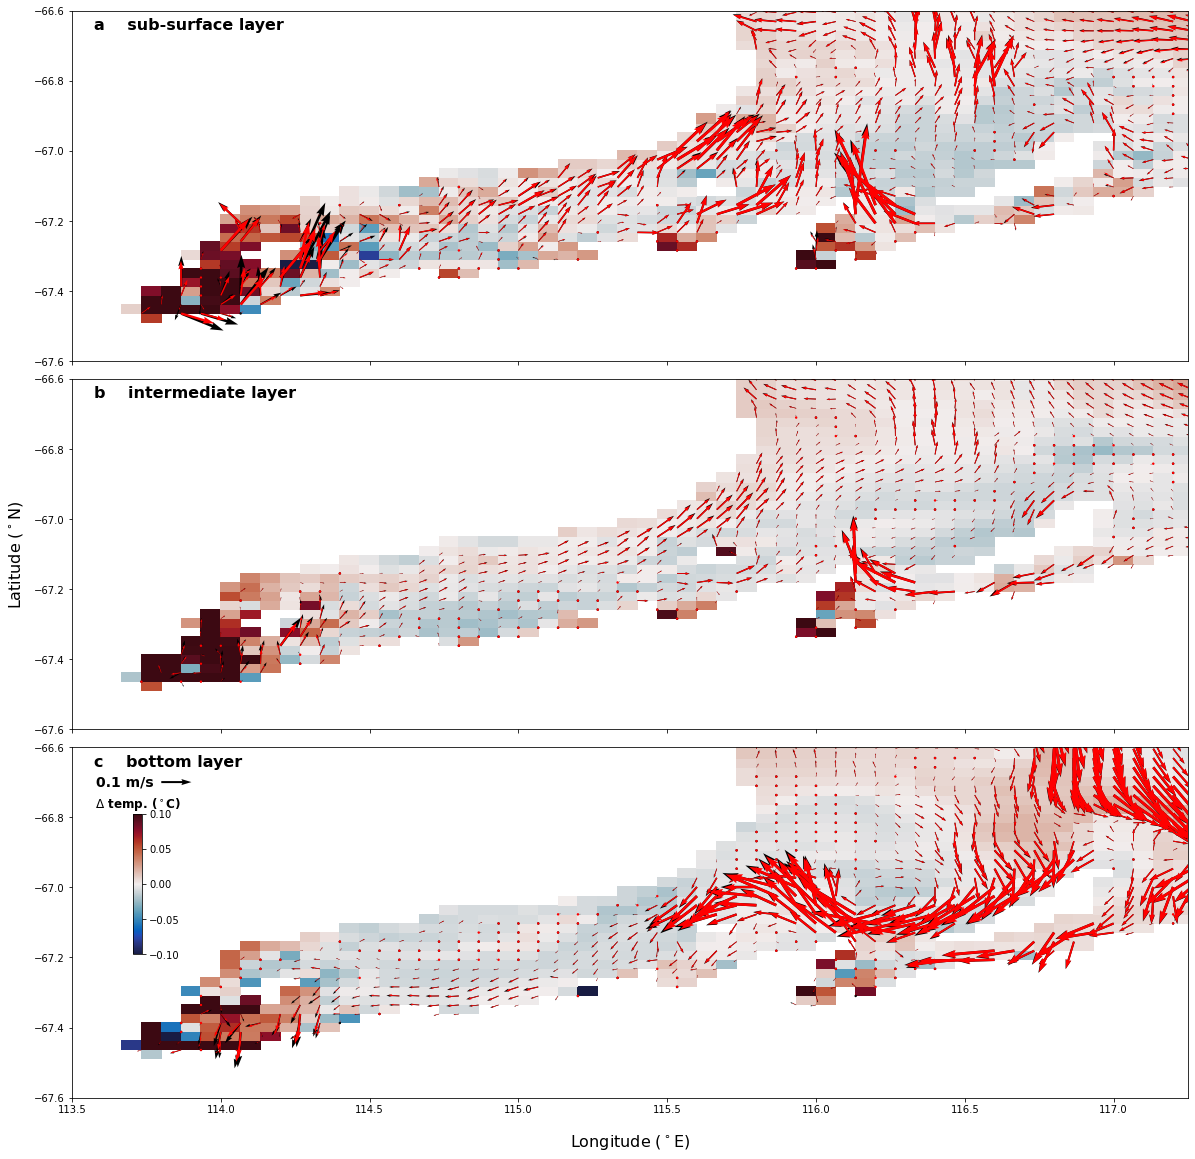

In [ ]:

gs = gridspec.GridSpec(nrows=3,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[20,20])
ax = None

ax=fig.add_subplot(gs[0,0])
im=ax.pcolormesh(gridFile.lon_rho,gridFile.lat_rho,norm.temp.isel(s_rho=25).mean(dim='ocean_time')-noflow.temp.isel(s_rho=25).mean(dim='ocean_time'),vmin=-.1,vmax=.1,cmap='cmo.balance')
qu = ax.quiver(gridFile.lon_rho,gridFile.lat_rho,norm_uv.u_rho.isel(s_rho=25).mean(dim='ocean_time'),norm_uv.v_rho.isel(s_rho=25).mean(dim='ocean_time'),units='xy',pivot='tail',scale=1,minshaft=3)
qu = ax.quiver(gridFile.lon_rho,gridFile.lat_rho,noflow_uv.u_rho.isel(s_rho=25).mean(dim='ocean_time'),noflow_uv.v_rho.isel(s_rho=25).mean(dim='ocean_time'),units='xy',pivot='tail',scale=1,color='r',minshaft=3)
ax.set_xticklabels([])
ax.set_xlim([113.5,117.25])
ax.set_ylim([-67.6,-66.6])
ax.text(0.02, 0.98, 'a    sub-surface layer', transform=ax.transAxes,fontsize=16, fontweight='bold', va='top')

ax=fig.add_subplot(gs[1,0])
im=ax.pcolormesh(gridFile.lon_rho,gridFile.lat_rho,norm.temp.isel(s_rho=15).mean(dim='ocean_time')-noflow.temp.isel(s_rho=15).mean(dim='ocean_time'),vmin=-.1,vmax=.1,cmap='cmo.balance')
qu = ax.quiver(gridFile.lon_rho,gridFile.lat_rho,norm_uv.u_rho.isel(s_rho=15).mean(dim='ocean_time'),norm_uv.v_rho.isel(s_rho=15).mean(dim='ocean_time'),units='xy',pivot='tail',scale=1,minshaft=3)
qu = ax.quiver(gridFile.lon_rho,gridFile.lat_rho,noflow_uv.u_rho.isel(s_rho=15).mean(dim='ocean_time'),noflow_uv.v_rho.isel(s_rho=15).mean(dim='ocean_time'),units='xy',pivot='tail',scale=1,color='r',minshaft=3)
ax.set_xticklabels([])
ax.set_xlim([113.5,117.25])
ax.set_ylim([-67.6,-66.6])
ax.text(0.02, 0.98, 'b    intermediate layer', transform=ax.transAxes,fontsize=16, fontweight='bold', va='top')
ax.text(-.05, .5, 'Latitude ($^\circ$N)',fontsize=16, va='center', ha='center', rotation='vertical', transform=ax.transAxes)

ax=fig.add_subplot(gs[2,0])
im=ax.pcolormesh(gridFile.lon_rho,gridFile.lat_rho,norm.temp.isel(s_rho=0).mean(dim='ocean_time')-noflow.temp.isel(s_rho=0).mean(dim='ocean_time'),vmin=-.1,vmax=.1,cmap='cmo.balance')
qu = ax.quiver(gridFile.lon_rho,gridFile.lat_rho,norm_uv.u_rho.isel(s_rho=0).mean(dim='ocean_time'),norm_uv.v_rho.isel(s_rho=0).mean(dim='ocean_time'),units='xy',pivot='tail',scale=1,minshaft=3)
qu = ax.quiver(gridFile.lon_rho,gridFile.lat_rho,noflow_uv.u_rho.isel(s_rho=0).mean(dim='ocean_time'),noflow_uv.v_rho.isel(s_rho=0).mean(dim='ocean_time'),units='xy',pivot='tail',scale=1,color='r',minshaft=3)
qu = ax.quiver(113.8,-66.7,.1,0,units='xy',pivot='tail',scale=1,color='k',minshaft=3)
ax.text(113.58,-66.7,'0.1 m/s',va='center',fontweight='bold',fontsize=14)
ax.set_xlim([113.5,117.25])
ax.set_ylim([-67.6,-66.6])
ax.text(0.5, -0.1, 'Longitude ($^\circ$E)',fontsize=16, va='top', ha='center', transform=ax.transAxes)
ax.text(0.02, 0.98, 'c    bottom layer', transform=ax.transAxes,fontsize=16, fontweight='bold', va='top')
cax = inset_axes(ax,
                 width="1%",  # width = 10% of parent_bbox width
                 height="50%",  # height : 50%
                 loc='lower left',
                 bbox_to_anchor=(.055,.41, .8, .8),
                 bbox_transform=ax.transAxes,
                 borderpad=0,
                 )
fig.colorbar(im,cax=cax)
cax.set_title('$\Delta$ temp. ($^\circ$C)',fontweight='bold')


In [ ]:
STOP

<ipython-input-15-1ab3797bff40>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(Y,Z,temp_500m.squeeze(),vmin=-2,vmax=0,cmap='cmo.thermal')


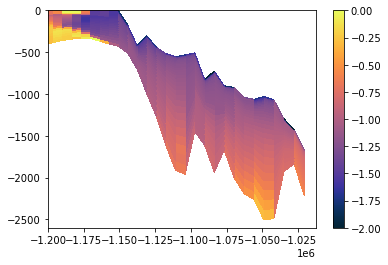

In [ ]:
depth_snapshot = norm['x_rho']
temp_500m = grid.transform(norm.temp.isel(ocean_time=360), 'X', np.array([2.285e6]),
                                target_data=depth_snapshot,
                                method='linear')

temp_500m#.isel(x_rho=0).plot(x='eta_rho',y='z_rho')


zz = grid.transform(norm.z_rho, 'X', np.array([2.285e6]),
                                target_data=depth_snapshot,
                                method='linear')

yy = grid.transform(norm.y_rho, 'X', np.array([2.285e6]),
                                target_data=depth_snapshot,
                                method='linear')



Z = zz.squeeze().fillna(20)

Y = yy.squeeze().fillna(-3e6)

plt.pcolormesh(Y,Z,temp_500m.squeeze(),vmin=-2,vmax=0,cmap='cmo.thermal')
plt.xlim([-1.20e6,-1.0125e6])
#plt.xlim([-1.50e6,-.975e6])
plt.ylim([-2600,0])
plt.colorbar()

<ipython-input-164-57ca57dda654>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X,Z,temp_500m.squeeze(),vmin=-2,vmax=0,cmap='cmo.thermal')


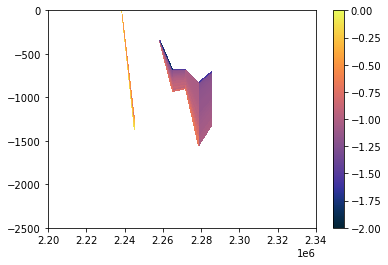

In [ ]:
grid = makeROMSGridObject(norm)
depth_snapshot = norm['y_rho']
temp_500m = grid.transform(norm.temp.isel(ocean_time=360), 'Y', np.array([-1.095e6]),
                                target_data=depth_snapshot,
                                method='linear')

temp_500m#.isel(x_rho=0).plot(x='eta_rho',y='z_rho')


zz = grid.transform(norm.z_rho, 'Y', np.array([-1.095e6]),
                                target_data=depth_snapshot,
                                method='linear')

xx = grid.transform(norm.x_rho, 'Y', np.array([-1.095e6]),
                                target_data=depth_snapshot,
                                method='linear')



Z = zz.squeeze().fillna(20)

X = xx.squeeze().fillna(-3e6)

plt.pcolormesh(X,Z,temp_500m.squeeze(),vmin=-2,vmax=0,cmap='cmo.thermal')
plt.xlim([2.200e6,2.340e6])
plt.ylim([-2500,0])
plt.colorbar()

(10.0, 30.0)

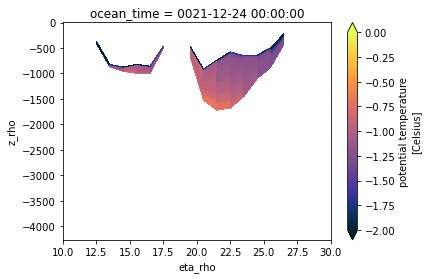

In [ ]:
norm.temp.isel(ocean_time=360,xi_rho=165).plot(y='z_rho',vmin=-2,vmax=0, cmap='cmo.thermal')
plt.xlim([10,30])


(140.0, 170.0)

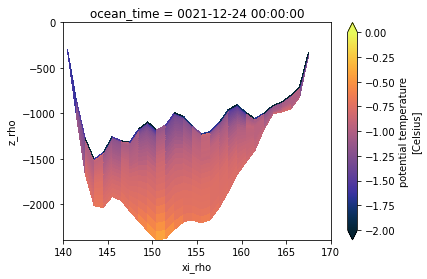

In [ ]:
norm.temp.isel(ocean_time=360,eta_rho=15).plot(y='z_rho',vmin=-2,vmax=0, cmap='cmo.thermal')
plt.xlim([140,170])

# NOW HONE EACH SUB PLOT INDIVIDUALLY

<ipython-input-167-47485a06a26c>:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=ax.pcolormesh(Y,Z,temp_500m.squeeze(),vmin=-2,vmax=0,cmap='cmo.thermal')


<Figure size 432x288 with 0 Axes>

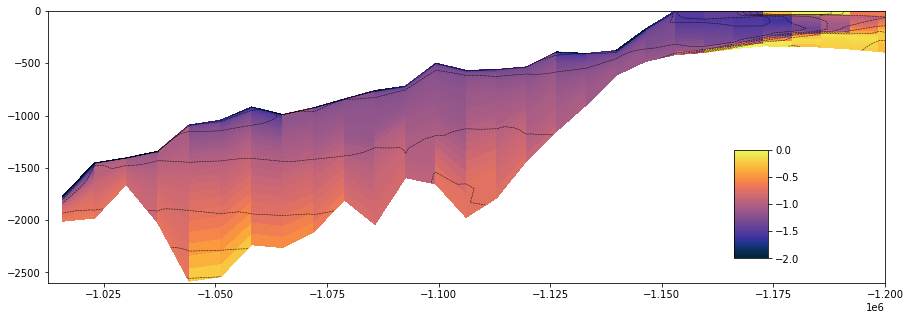

In [ ]:
grid = makeROMSGridObject(norm)
depth_snapshot = norm['x_rho']
temp_500m = grid.transform(norm.temp.isel(ocean_time=360), 'X', np.array([2.284e6]),
                                target_data=depth_snapshot,
                                method='linear')

temp_500m#.isel(x_rho=0).plot(x='eta_rho',y='z_rho')


zz = grid.transform(norm.z_rho, 'X', np.array([2.284e6]),
                                target_data=depth_snapshot,
                                method='linear')

yy = grid.transform(norm.y_rho, 'X', np.array([2.284e6]),
                                target_data=depth_snapshot,
                                method='linear')



Z = zz.squeeze().fillna(20)
Y = np.tile(yy.squeeze().fillna(-3e6),[31,1])





gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,5])
ax = None

ax=fig.add_subplot(gs[0,0])
im=ax.pcolormesh(Y,Z,temp_500m.squeeze(),vmin=-2,vmax=0,cmap='cmo.thermal')
co=ax.contour(Y,Z,temp_500m.squeeze(),levels=np.arange(-2,0,.25),colors='k',linewidths=0.5)
ax.set_xlim([-1.20e6,-1.0125e6])
#plt.xlim([-1.50e6,-.975e6])
ax.set_ylim([-2600,0])
cax = inset_axes(ax,
                 width="5%",  # width = 10% of parent_bbox width
                 height="50%",  # height : 50%
                 loc='lower left',
                 bbox_to_anchor=(.82,.09, .8, .8),
                 bbox_transform=ax.transAxes,
                 borderpad=0,
                 )
fig.colorbar(im,cax=cax)
ax.invert_xaxis()

<ipython-input-168-581a2ee2ec07>:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=ax.pcolormesh(X/1e3,Z,temp_500m.squeeze(),vmin=-2,vmax=0,cmap='cmo.thermal')


<Figure size 432x288 with 0 Axes>

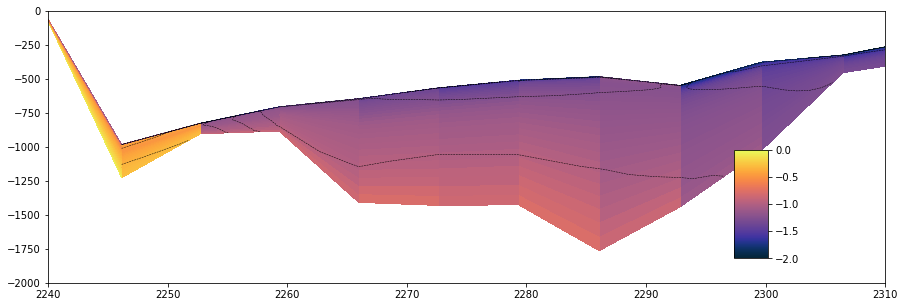

In [ ]:
grid = makeROMSGridObject(norm)
depth_snapshot = norm['y_rho']
temp_500m = grid.transform(norm.temp.isel(ocean_time=360), 'Y', np.array([-1.115e6]),
                                target_data=depth_snapshot,
                                method='linear')

temp_500m#.isel(x_rho=0).plot(x='eta_rho',y='z_rho')


zz = grid.transform(norm.z_rho, 'Y', np.array([-1.115e6]),
                                target_data=depth_snapshot,
                                method='linear')

xx = grid.transform(norm.x_rho, 'Y', np.array([-1.115e6]),
                                target_data=depth_snapshot,
                                method='linear')



Z = zz.squeeze().fillna(20)
X = np.tile(xx.squeeze().fillna(-3e6),[31,1])





gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,5])
ax = None

ax=fig.add_subplot(gs[0,0])
im=ax.pcolormesh(X/1e3,Z,temp_500m.squeeze(),vmin=-2,vmax=0,cmap='cmo.thermal')
co=ax.contour(X/1e3,Z,temp_500m.squeeze(),levels=np.arange(-2,0,.25),colors='k',linewidths=0.5)
plt.xlim([2.2400e6/1e3,2.310e6/1e3])
plt.ylim([-2000,0])
cax = inset_axes(ax,
                 width="5%",  # width = 10% of parent_bbox width
                 height="50%",  # height : 50%
                 loc='lower left',
                 bbox_to_anchor=(.82,.09, .8, .8),
                 bbox_transform=ax.transAxes,
                 borderpad=0,
                 )
fig.colorbar(im,cax=cax)


In [ ]:
X

array([[-3000000., -3000000., -3000000., ..., -3000000., -3000000.,
        -3000000.],
       [-3000000., -3000000., -3000000., ..., -3000000., -3000000.,
        -3000000.],
       [-3000000., -3000000., -3000000., ..., -3000000., -3000000.,
        -3000000.],
       ...,
       [-3000000., -3000000., -3000000., ..., -3000000., -3000000.,
        -3000000.],
       [-3000000., -3000000., -3000000., ..., -3000000., -3000000.,
        -3000000.],
       [-3000000., -3000000., -3000000., ..., -3000000., -3000000.,
        -3000000.]])

<ipython-input-170-21e22a9faac8>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(gridFile.x_rho,gridFile.y_rho,gridFile.h+gridFile.zice,vmin=0,vmax=100)


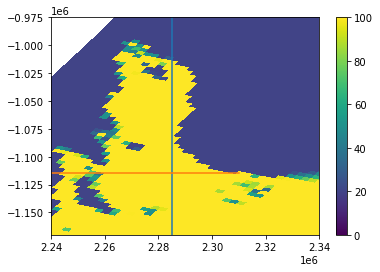

In [ ]:
plt.pcolormesh(gridFile.x_rho,gridFile.y_rho,gridFile.h+gridFile.zice,vmin=0,vmax=100)
plt.xlim([2.240e6,2.340e6])
plt.ylim([-1.170e6,-.975e6])
plt.colorbar()
plt.plot([2.285e6,2.285e6],[-1.2e6,-.975e6])
plt.plot([2.24e6,2.31e6],[-1.115e6,-1.115e6])


In [ ]:
grid = makeROMSGridObject(norm)

norm_depth_snapshot_1 = norm['y_rho']
norm_temp_1 = grid.transform(norm.temp.mean(dim='ocean_time'), 'Y', np.array([-1.115e6]),
                                target_data=norm_depth_snapshot_1,
                                method='linear')


norm_zz_1 = grid.transform(norm.z_rho, 'Y', np.array([-1.115e6]),
                                target_data=norm_depth_snapshot_1,
                                method='linear')

norm_xx_1 = grid.transform(norm.x_rho, 'Y', np.array([-1.115e6]),
                                target_data=norm_depth_snapshot_1,
                                method='linear')



norm_Z_1 = norm_zz_1.squeeze().fillna(20)
norm_X_1 = np.tile(norm_xx_1.squeeze().fillna(-3e6),[31,1])



norm_depth_snapshot_2 = norm['x_rho']
norm_temp_2 = grid.transform(norm.temp.mean(dim='ocean_time'), 'X', np.array([2.284e6]),
                                target_data=norm_depth_snapshot_2,
                                method='linear')


norm_zz_2 = grid.transform(norm.z_rho, 'X', np.array([2.284e6]),
                                target_data=norm_depth_snapshot_2,
                                method='linear')

norm_yy_2 = grid.transform(norm.y_rho, 'X', np.array([2.284e6]),
                                target_data=norm_depth_snapshot_2,
                                method='linear')



norm_Z_2 = norm_zz_2.squeeze().fillna(20)
norm_Y_2 = np.tile(norm_yy_2.squeeze().fillna(-3e6),[31,1])

In [ ]:
grid = makeROMSGridObject(noflow)

noflow_depth_snapshot_1 = noflow['y_rho']
noflow_temp_1 = grid.transform(noflow.temp.mean(dim='ocean_time'), 'Y', np.array([-1.115e6]),
                                target_data=noflow_depth_snapshot_1,
                                method='linear')


noflow_zz_1 = grid.transform(noflow.z_rho, 'Y', np.array([-1.115e6]),
                                target_data=noflow_depth_snapshot_1,
                                method='linear')

noflow_xx_1 = grid.transform(noflow.x_rho, 'Y', np.array([-1.115e6]),
                                target_data=noflow_depth_snapshot_1,
                                method='linear')



noflow_Z_1 = noflow_zz_1.squeeze().fillna(20)
noflow_X_1 = np.tile(noflow_xx_1.squeeze().fillna(-3e6),[31,1])



noflow_depth_snapshot_2 = noflow['x_rho']
noflow_temp_2 = grid.transform(noflow.temp.mean(dim='ocean_time'), 'X', np.array([2.284e6]),
                                target_data=noflow_depth_snapshot_2,
                                method='linear')


noflow_zz_2 = grid.transform(noflow.z_rho, 'X', np.array([2.284e6]),
                                target_data=noflow_depth_snapshot_2,
                                method='linear')

noflow_yy_2 = grid.transform(noflow.y_rho, 'X', np.array([2.284e6]),
                                target_data=noflow_depth_snapshot_2,
                                method='linear')



noflow_Z_2 = noflow_zz_2.squeeze().fillna(20)
noflow_Y_2 = np.tile(noflow_yy_2.squeeze().fillna(-3e6),[31,1])

<ipython-input-176-698615112c6a>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=ax.pcolormesh(noflow_Y_2,noflow_Z_2,noflow_temp_2.squeeze(),vmin=-2,vmax=0,cmap='cmo.thermal')
<ipython-input-176-698615112c6a>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=ax.pcolormesh(noflow_X_1,noflow_Z_1,noflow_temp_1.squeeze(),vmin=-2,vmax=0,cmap='cmo.thermal')
<ipython-input-176-698615112c6a>:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have t

<Figure size 432x288 with 0 Axes>

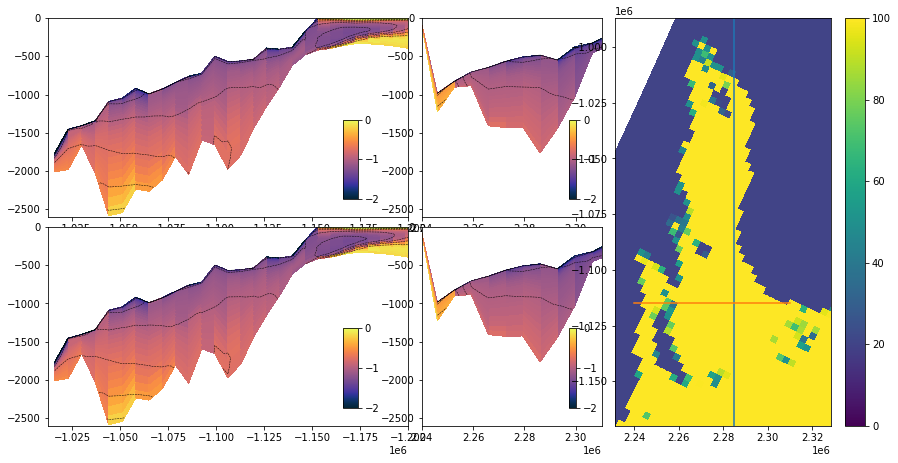

In [ ]:


gs = gridspec.GridSpec(nrows=2,ncols=3,wspace=0.05, hspace=0.05,width_ratios=[2, 1, 1.5])
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,7.5])
ax = None

ax=fig.add_subplot(gs[0,0])
im=ax.pcolormesh(noflow_Y_2,noflow_Z_2,noflow_temp_2.squeeze(),vmin=-2,vmax=0,cmap='cmo.thermal')
co=ax.contour(noflow_Y_2,noflow_Z_2,noflow_temp_2.squeeze(),levels=np.arange(-2,0,.25),colors='k',linewidths=0.5)
ax.set_xlim([-1.20e6,-1.0125e6])
#plt.xlim([-1.50e6,-.975e6])
ax.set_ylim([-2600,0])
cax = inset_axes(ax,
                 width="5%",  # width = 10% of parent_bbox width
                 height="50%",  # height : 50%
                 loc='lower left',
                 bbox_to_anchor=(.82,.09, .8, .8),
                 bbox_transform=ax.transAxes,
                 borderpad=0,
                 )
fig.colorbar(im,cax=cax)
ax.invert_xaxis()

ax=fig.add_subplot(gs[0,1])
im=ax.pcolormesh(noflow_X_1,noflow_Z_1,noflow_temp_1.squeeze(),vmin=-2,vmax=0,cmap='cmo.thermal')
co=ax.contour(noflow_X_1,noflow_Z_1,noflow_temp_1.squeeze(),levels=np.arange(-2,0,.25),colors='k',linewidths=0.5)
plt.xlim([2.2400e6,2.310e6])
plt.ylim([-2600,0])
cax = inset_axes(ax,
                 width="5%",  # width = 10% of parent_bbox width
                 height="50%",  # height : 50%
                 loc='lower left',
                 bbox_to_anchor=(.82,.09, .8, .8),
                 bbox_transform=ax.transAxes,
                 borderpad=0,
                 )
fig.colorbar(im,cax=cax)

ax=fig.add_subplot(gs[1,0])
im=ax.pcolormesh(norm_Y_2,norm_Z_2,norm_temp_2.squeeze(),vmin=-2,vmax=0,cmap='cmo.thermal')
co=ax.contour(norm_Y_2,norm_Z_2,norm_temp_2.squeeze(),levels=np.arange(-2,0,.25),colors='k',linewidths=0.5)
ax.set_xlim([-1.20e6,-1.0125e6])
#plt.xlim([-1.50e6,-.975e6])
ax.set_ylim([-2600,0])
cax = inset_axes(ax,
                 width="5%",  # width = 10% of parent_bbox width
                 height="50%",  # height : 50%
                 loc='lower left',
                 bbox_to_anchor=(.82,.09, .8, .8),
                 bbox_transform=ax.transAxes,
                 borderpad=0,
                 )
fig.colorbar(im,cax=cax)
ax.invert_xaxis()

ax=fig.add_subplot(gs[1,1])
im=ax.pcolormesh(norm_X_1,norm_Z_1,norm_temp_1.squeeze(),vmin=-2,vmax=0,cmap='cmo.thermal')
co=ax.contour(norm_X_1,norm_Z_1,norm_temp_1.squeeze(),levels=np.arange(-2,0,.25),colors='k',linewidths=0.5)
plt.xlim([2.2400e6,2.310e6])
plt.ylim([-2600,0])
cax = inset_axes(ax,
                 width="5%",  # width = 10% of parent_bbox width
                 height="50%",  # height : 50%
                 loc='lower left',
                 bbox_to_anchor=(.82,.09, .8, .8),
                 bbox_transform=ax.transAxes,
                 borderpad=0,
                 )
fig.colorbar(im,cax=cax)


ax=fig.add_subplot(gs[0:2,2])
im = ax.pcolormesh(gridFile.x_rho,gridFile.y_rho,gridFile.h+gridFile.zice,vmin=0,vmax=100)
ax.axis('equal')
ax.set_xlim([2.240e6,2.32e6])
ax.set_ylim([-1.170e6,-.987e6])
fig.colorbar(im)
plt.plot([2.285e6,2.285e6],[-1.2e6,-.975e6])
plt.plot([2.24e6,2.31e6],[-1.115e6,-1.115e6])


<ipython-input-214-3e170e0d4968>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=ax.pcolormesh(noflow_Y_2/1e3,noflow_Z_2,noflow_temp_2.squeeze(),vmin=-2,vmax=0,cmap='cmo.thermal')
<ipython-input-214-3e170e0d4968>:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=ax.pcolormesh(noflow_X_1/1e3,noflow_Z_1,noflow_temp_1.squeeze(),vmin=-2,vmax=0,cmap='cmo.thermal')
<ipython-input-214-3e170e0d4968>:46: MatplotlibDeprecationWarning: shading='flat' when X and 

Text(0.75, 0.33, ' B   ')

<Figure size 432x288 with 0 Axes>

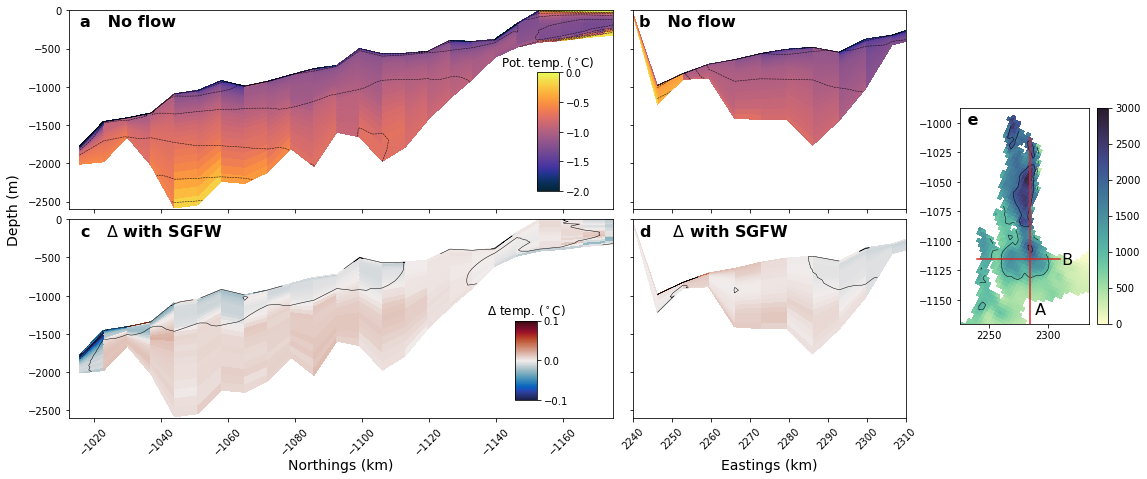

In [ ]:


gs = gridspec.GridSpec(nrows=2,ncols=2,wspace=0.05, hspace=0.05,width_ratios=[2, 1])
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,7.5])
ax = None

ax=fig.add_subplot(gs[0,0])
im=ax.pcolormesh(noflow_Y_2/1e3,noflow_Z_2,noflow_temp_2.squeeze(),vmin=-2,vmax=0,cmap='cmo.thermal')
co=ax.contour(noflow_Y_2/1e3,noflow_Z_2,noflow_temp_2.squeeze(),levels=np.arange(-2,0,.25),colors='k',linewidths=0.5)
ax.set_xlim([-1.175e6/1e3,-1.0125e6/1e3])
#plt.xlim([-1.50e6,-.975e6])
ax.set_ylim([-2600,0])
cax = inset_axes(ax,
                 width="5%",  # width = 10% of parent_bbox width
                 height="75%",  # height : 50%
                 loc='lower left',
                 bbox_to_anchor=(.86,.09, .8, .8),
                 bbox_transform=ax.transAxes,
                 borderpad=0,
                 )
cax.set_title('Pot. temp. ($^\circ$C)')
fig.colorbar(im,cax=cax)
ax.invert_xaxis()
ax.set_xticklabels([])
ax.text(0.02, 0.98, 'a   No flow', transform=ax.transAxes,fontsize=16, fontweight='bold', va='top')

ax=fig.add_subplot(gs[0,1])
im=ax.pcolormesh(noflow_X_1/1e3,noflow_Z_1,noflow_temp_1.squeeze(),vmin=-2,vmax=0,cmap='cmo.thermal')
co=ax.contour(noflow_X_1/1e3,noflow_Z_1,noflow_temp_1.squeeze(),levels=np.arange(-2,0,.25),colors='k',linewidths=0.5)
plt.xlim([2.2400e6/1e3,2.310e6/1e3])
plt.ylim([-2600,0])
# cax = inset_axes(ax,
#                  width="5%",  # width = 10% of parent_bbox width
#                  height="50%",  # height : 50%
#                  loc='lower left',
#                  bbox_to_anchor=(.82,.09, .8, .8),
#                  bbox_transform=ax.transAxes,
#                  borderpad=0,
#                  )
# fig.colorbar(im,cax=cax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(0.02, 0.98, 'b   No flow', transform=ax.transAxes,fontsize=16, fontweight='bold', va='top')

ax=fig.add_subplot(gs[1,0])
im=ax.pcolormesh(norm_Y_2/1e3,norm_Z_2,noflow_temp_2.squeeze()-norm_temp_2.squeeze(),vmin=-.1,vmax=0.1,cmap='cmo.balance')
co=ax.contour(norm_Y_2/1e3,norm_Z_2,noflow_temp_2.squeeze()-norm_temp_2.squeeze(),levels=np.arange(-.1,.1,.05),colors='k',linewidths=0.5)
ax.set_xlim([-1.175e6/1e3,-1.0125e6/1e3])
#plt.xlim([-1.50e6,-.975e6])
ax.set_ylim([-2600,0])
cax = inset_axes(ax,
                 width="5%",  # width = 10% of parent_bbox width
                 height="50%",  # height : 50%
                 loc='lower left',
                 bbox_to_anchor=(.82,.09, .8, .8),
                 bbox_transform=ax.transAxes,
                 borderpad=0,
                 )
fig.colorbar(im,cax=cax)
cax.set_title('$\Delta$ temp. ($^\circ$C)')
ax.invert_xaxis()
ax.text(0.5, -0.2, 'Northings (km)',fontsize=14, va='top', ha='center', transform=ax.transAxes)
ax.text(-.1, 1.05, 'Depth (m)',fontsize=14, va='center', ha='center', rotation='vertical', transform=ax.transAxes)
ax.tick_params('x',labelrotation=45)
ax.text(0.02, 0.98, 'c   $\Delta$ with SGFW', transform=ax.transAxes,fontsize=16, fontweight='bold', va='top')

ax=fig.add_subplot(gs[1,1])
im=ax.pcolormesh(norm_X_1/1e3,norm_Z_1,noflow_temp_1.squeeze()-norm_temp_1.squeeze(),vmax=.1,vmin=-.1,cmap='cmo.balance')
co=ax.contour(norm_X_1/1e3,norm_Z_1,noflow_temp_1.squeeze()-norm_temp_1.squeeze(),levels=np.arange(-.1,.1,.05),colors='k',linewidths=0.5)
plt.xlim([2.2400e6/1e3,2.310e6/1e3])
plt.ylim([-2600,0])
# cax = inset_axes(ax,
#                  width="5%",  # width = 10% of parent_bbox width
#                  height="50%",  # height : 50%
#                  loc='lower left',
#                  bbox_to_anchor=(.82,.09, .8, .8),
#                  bbox_transform=ax.transAxes,
#                  borderpad=0,
#                  )
# fig.colorbar(im,cax=cax)
ax.set_yticklabels([])
ax.text(0.5, -0.2, 'Eastings (km)',fontsize=14, va='top', ha='center', transform=ax.transAxes)
ax.tick_params(labelrotation=45)
ax.text(0.02, 0.98, 'd    $\Delta$ with SGFW', transform=ax.transAxes,fontsize=16, fontweight='bold', va='top')



axins = fig.add_axes([.95, .3, 0.15, 0.4])
im = axins.pcolormesh(gridFile.x_rho/1000,gridFile.y_rho/1000,gridFile.h.where(norm.zice!=0,np.nan),vmin=0,vmax=3000,cmap='cmo.deep',shading='nearest')
co = axins.contour(gridFile.x_rho/1000,gridFile.y_rho/1000,gridFile.h.where(norm.zice!=0,np.nan),levels=[0,1000,2000,3000],colors='k',vmin=0,vmax=3000,linewidths=0.5)
axins.axis('equal')
axins.set_xlim([2.240e3,2.32e3])
axins.set_ylim([-1.170e3,-.987e3])
fig.colorbar(im)
plt.plot([2.285e3,2.285e3],[-1.175e3,-1.0125e3],color='C3')
plt.plot([2.24e3,2.31e3],[-1.115e3,-1.115e3],color='C3')
axins.text(0.02, 0.98, ' e   ', transform=axins.transAxes,fontsize=16, fontweight='bold', va='top')
axins.text(0.54, 0.1, ' A   ', transform=axins.transAxes,fontsize=16, va='top')
axins.text(0.75, 0.33, ' B   ', transform=axins.transAxes,fontsize=16, va='top')
